In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000354647"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000354647
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,CVB FINANCIAL CORP
Ticker,CVBF


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,60.0,7.204500e+00,2.119134e+00,4.42,5.737500e+00,6.765000e+00,8.495000e+00,1.351000e+01
interest income,60.0,7.190972e+07,1.363281e+07,40664000.00,6.442000e+07,6.945100e+07,8.014550e+07,1.177200e+08
net income,60.0,2.160486e+07,8.205913e+06,12520.00,1.695100e+07,1.916850e+07,2.549150e+07,5.164200e+07
net interest income,39.0,5.700851e+07,1.617856e+07,32571000.00,4.596600e+07,5.974400e+07,6.285900e+07,1.100160e+08
provision for loan losses,47.0,3.276979e+06,7.956144e+06,-7600000.00,0.000000e+00,0.000000e+00,3.500000e+06,2.550000e+07
total revenue,5.0,5.541060e+07,6.219288e+06,49576000.00,5.087900e+07,5.240300e+07,6.118500e+07,6.301000e+07


# Plots

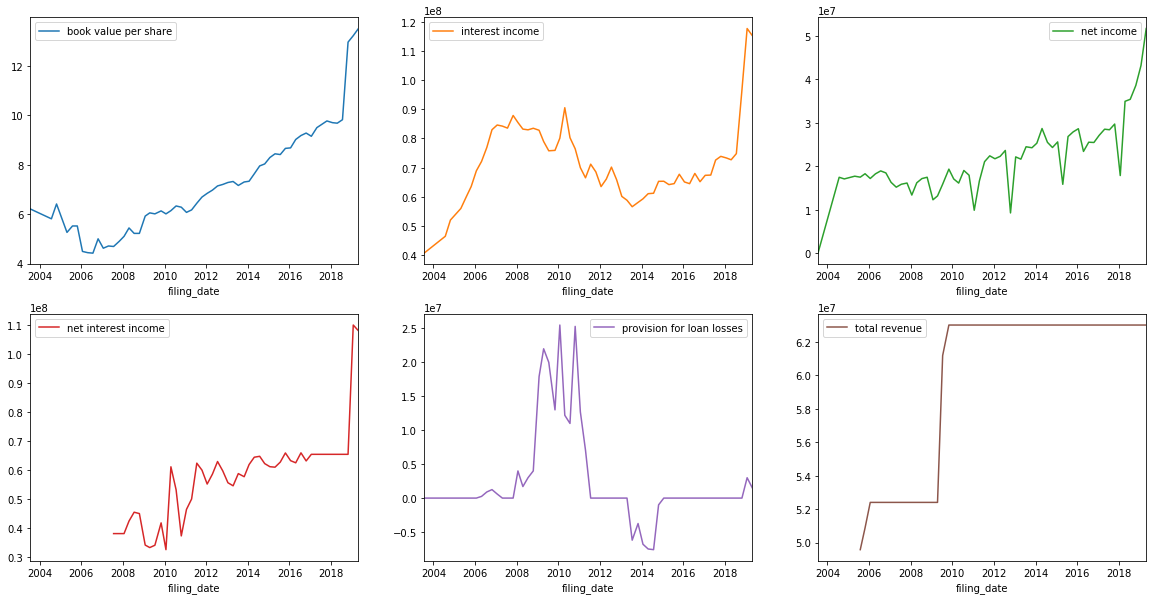

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000354647 book value per share        2003Q3 to 2004Q1: 3 periods  missing   
           book value per share                             2004Q4  missing   
           interest income             2003Q3 to 2004Q1: 3 periods  missing   
           interest income                                  2004Q4  missing   
           net income                  2003Q3 to 2004Q1: 3 periods  missing   
           net income                                       2004Q4  missing   
           net interest income        2003Q2 to 2007Q1: 16 periods  missing   
           net interest income         2007Q3 to 2007Q4: 2 periods  missing   
           net interest income         2017Q1 to 2018Q3: 7 periods  missing   
           provision for loan losses   2003Q3 to 2004Q1: 3 periods  missing   
           provision for loan losses                        2004Q4  missing   
           provision for loan losses   2015Q2 to 2015Q4: 3 periods  missing   
           provision for loan losses  2016Q2 to 2018Q3: 10 periods  missing   
           total revenue               2003Q2 to 2005Q1: 8 periods  missing   
           total revenue              2006Q1 to 2009Q1: 13 periods  missing   
           total revenue              2009Q4 to 2019Q1: 38 periods  missing   

                                             message  
cik        item                                       
0000354647 book value per share       Missing period  
           book value per share       Missing period  
           interest income            Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period  
           total revenue              Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()